In [41]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import matplotlib
import geopandas as gpd

In [42]:
df = pd.read_csv('ca_counties_employment_GEOID.csv', sep=',')

In [43]:
mapdf = gpd.read_file('CA_Counties/CA_Counties_TIGER2016.shp')

In [44]:
mapdf['NAME'] = mapdf['NAME'].str.lower()
mapdf.GEOID = mapdf.GEOID.astype('int')

In [45]:
df.unemployment_rate = df.unemployment_rate.apply(lambda x: x * 100).round(1)

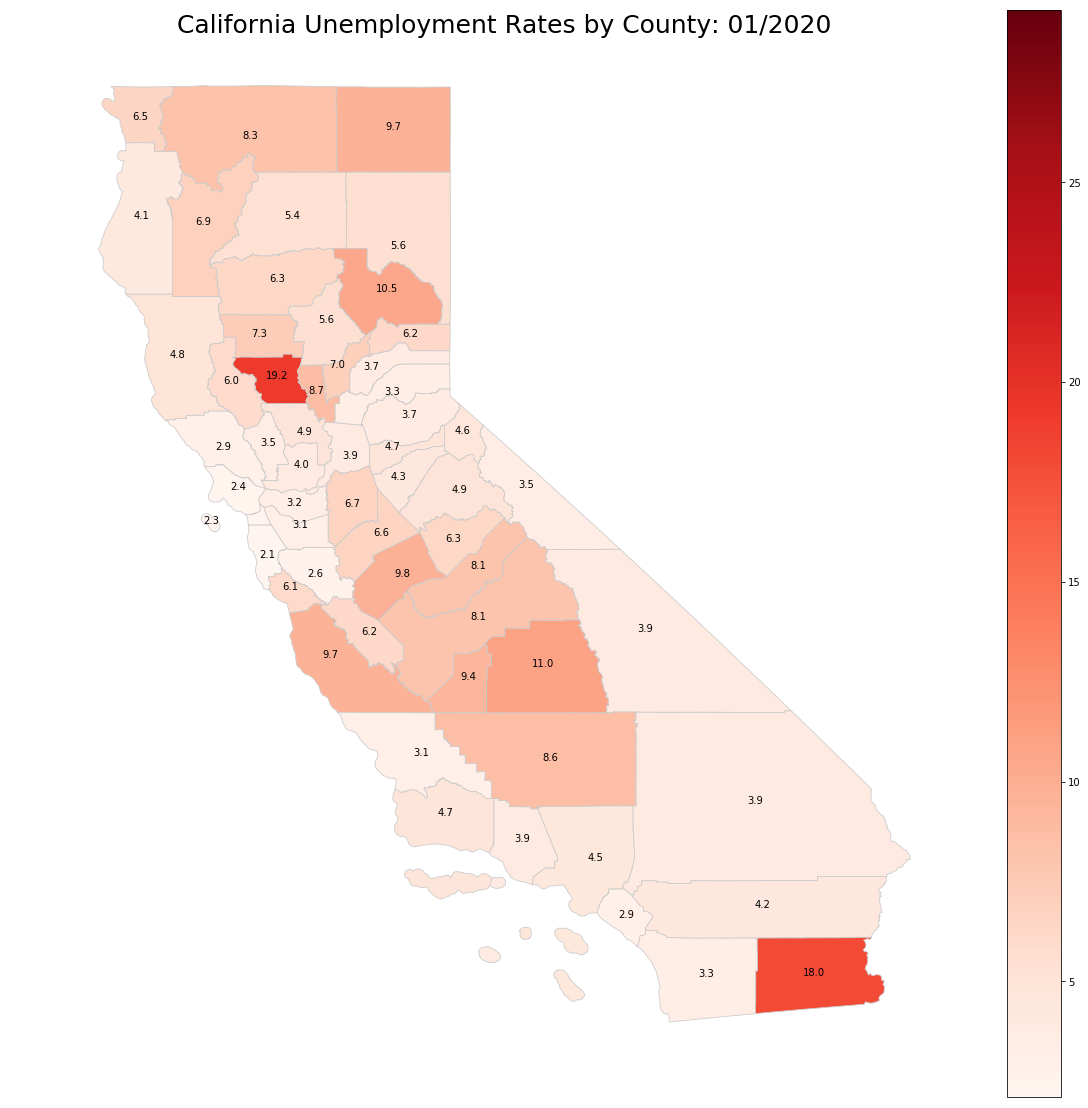

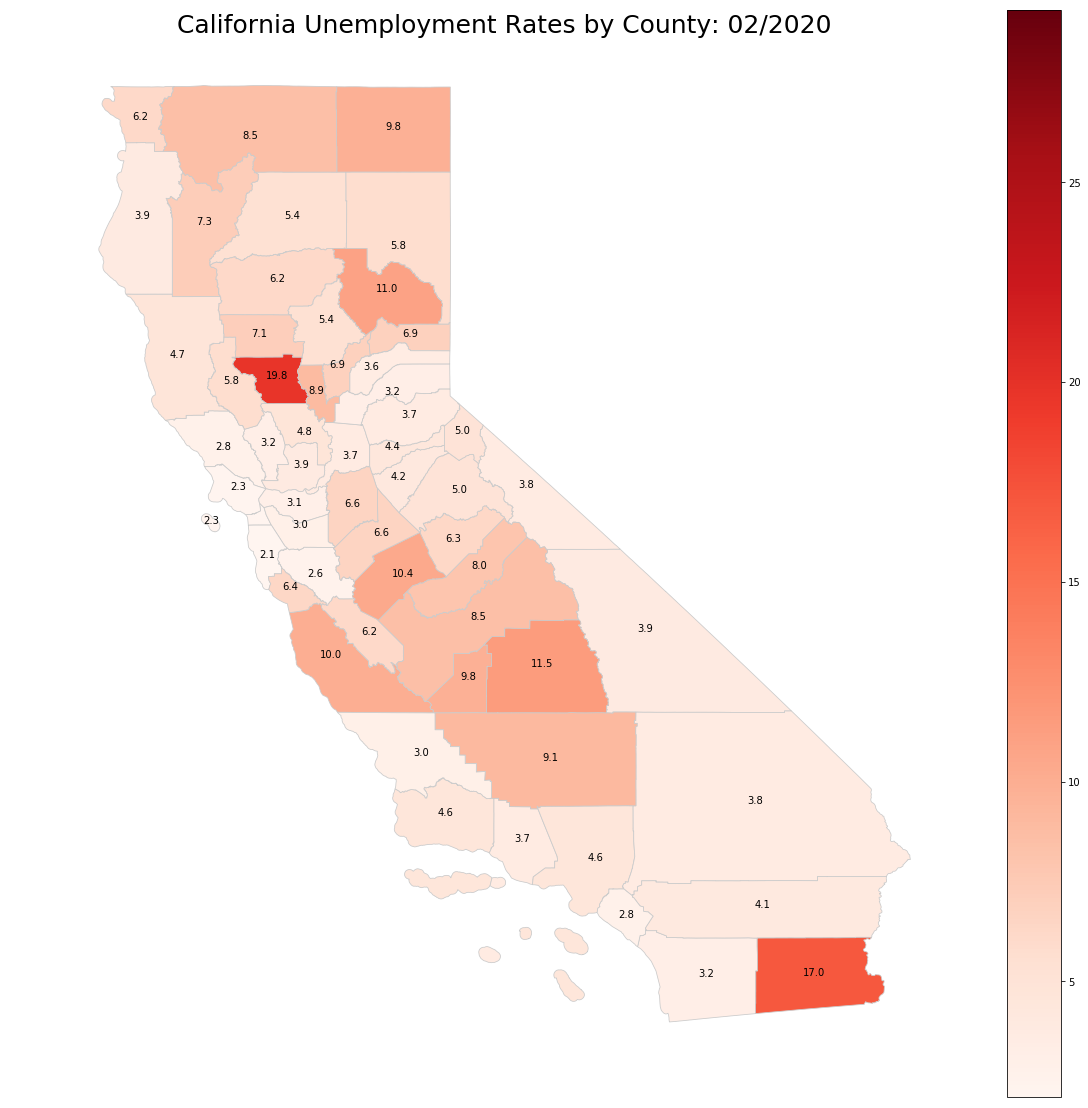

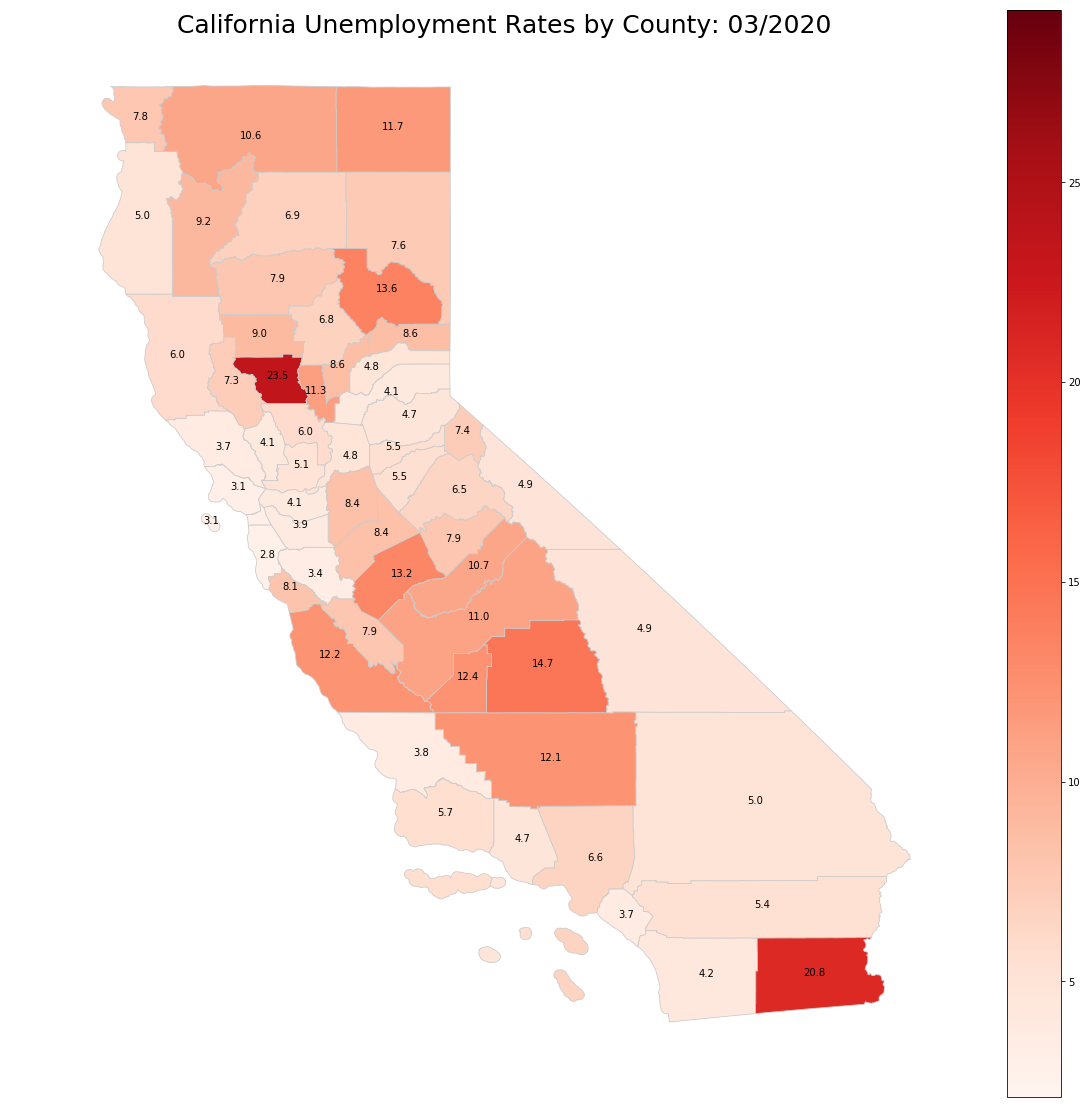

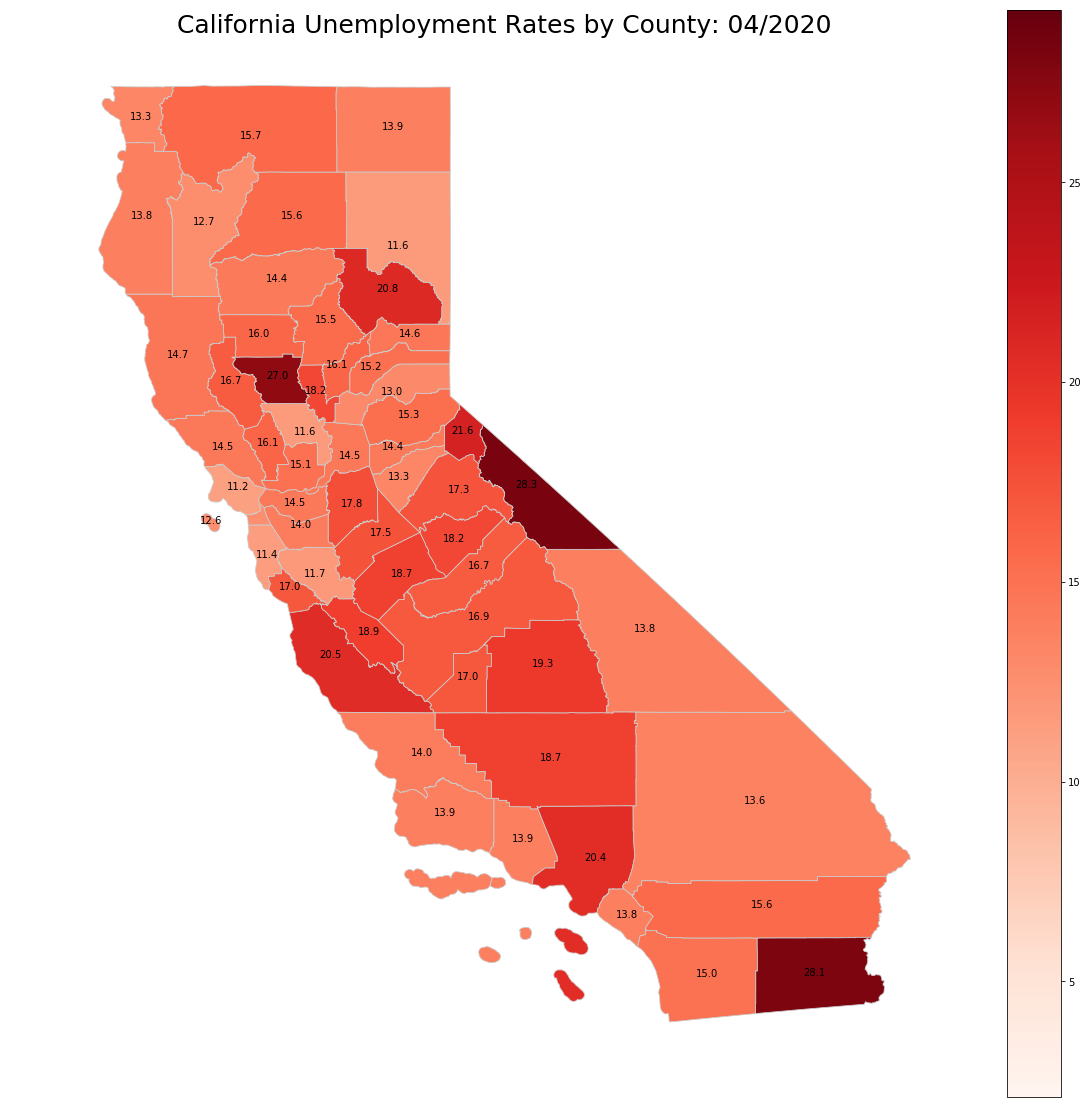

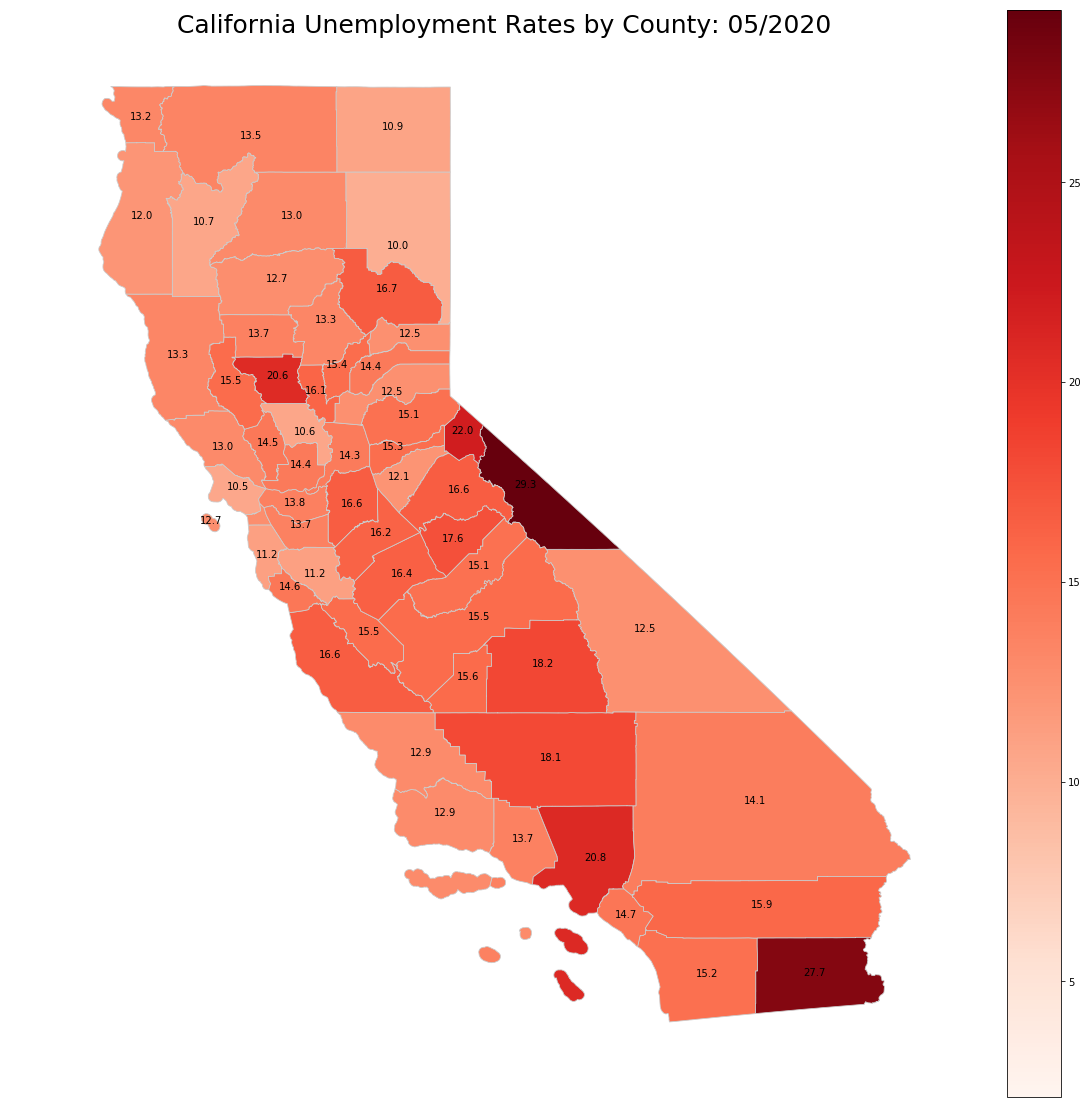

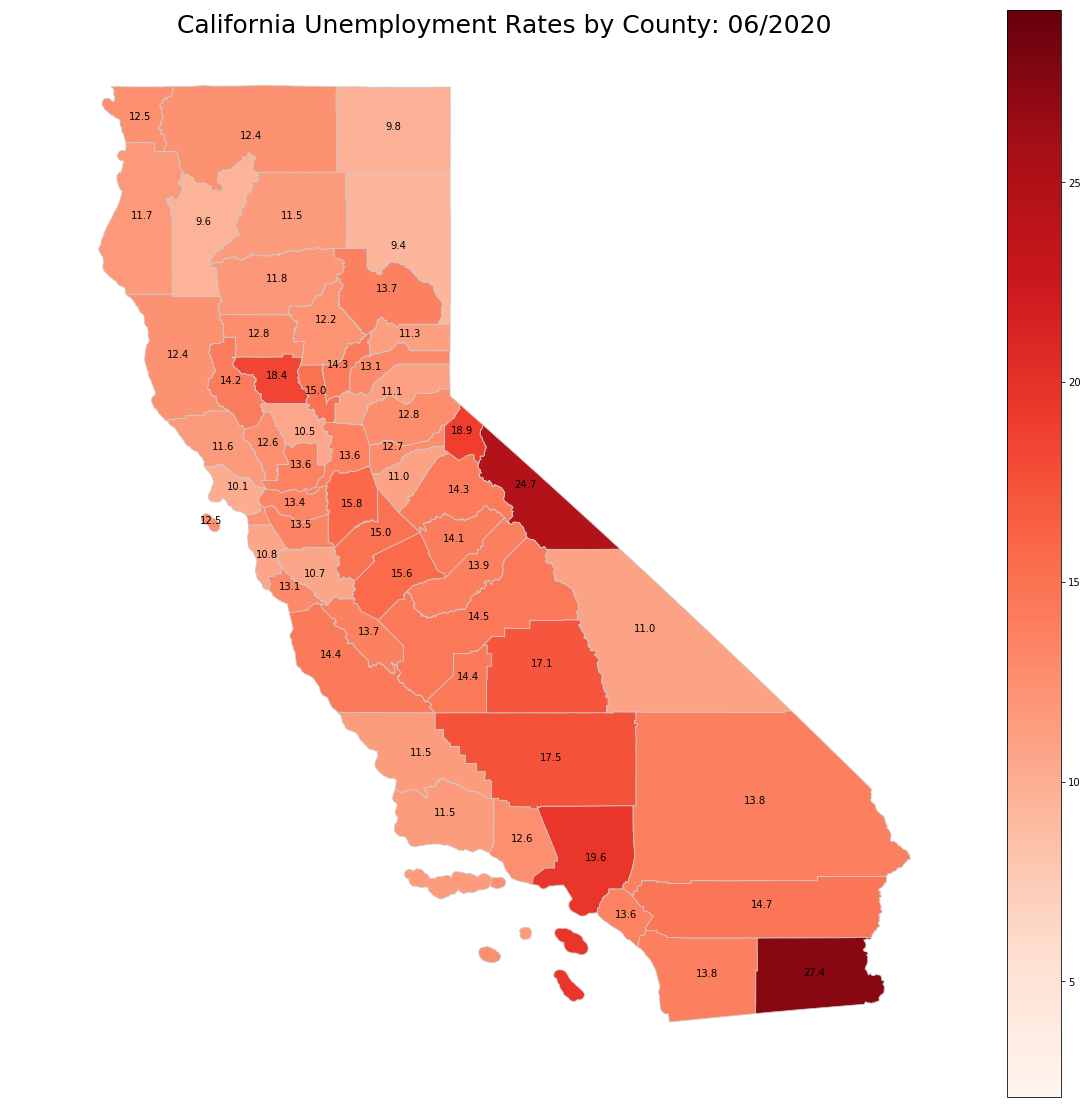

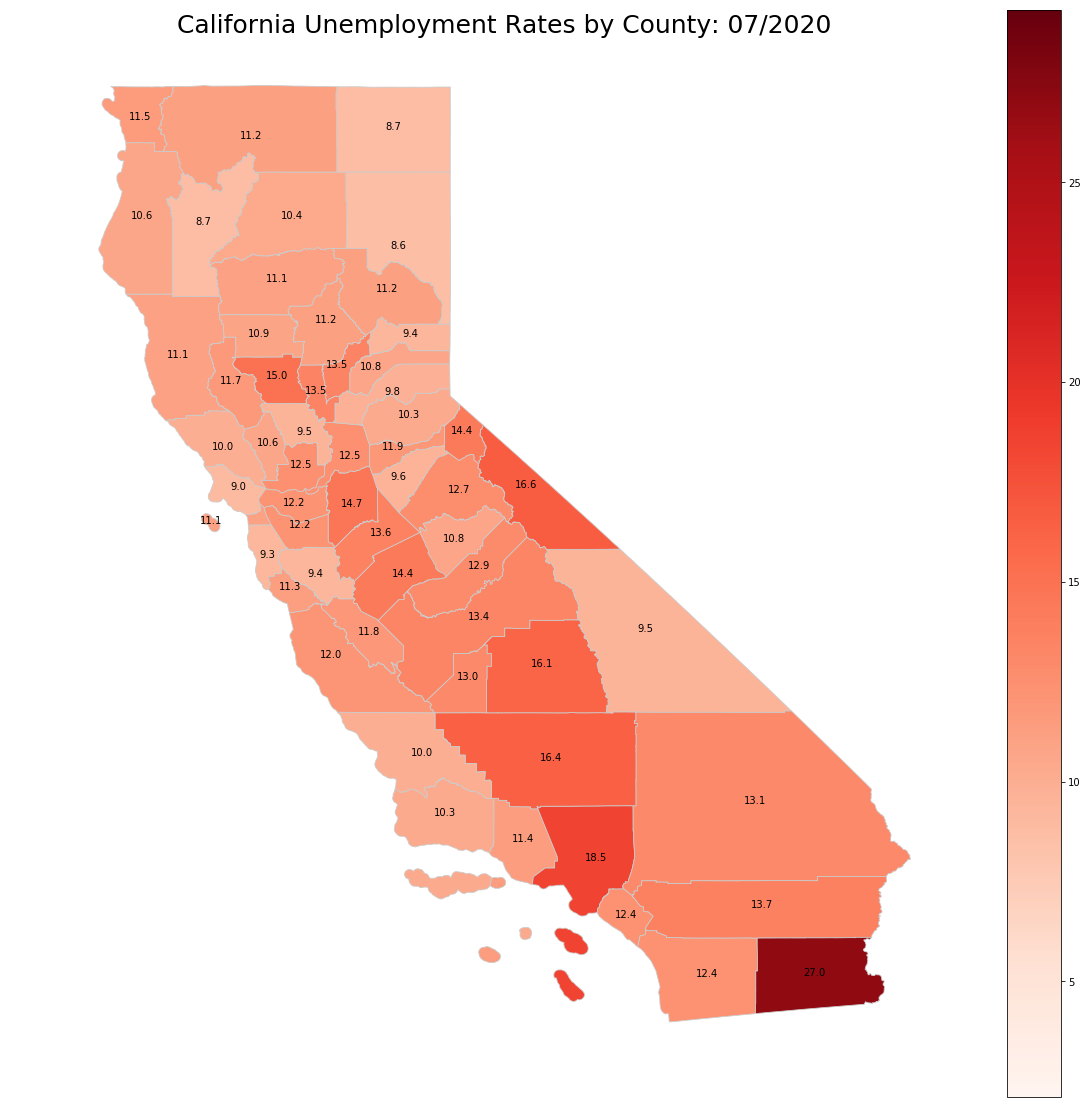

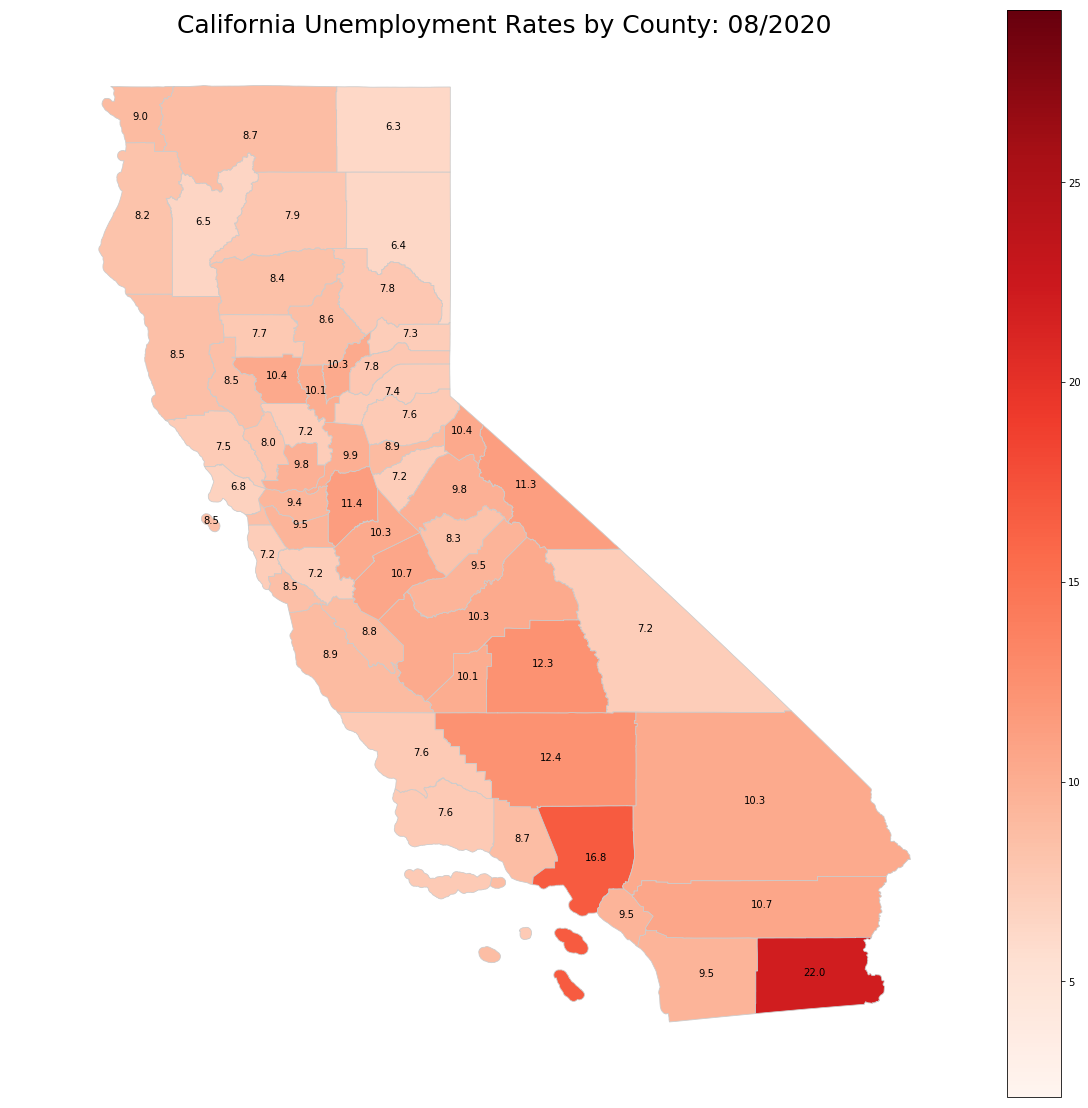

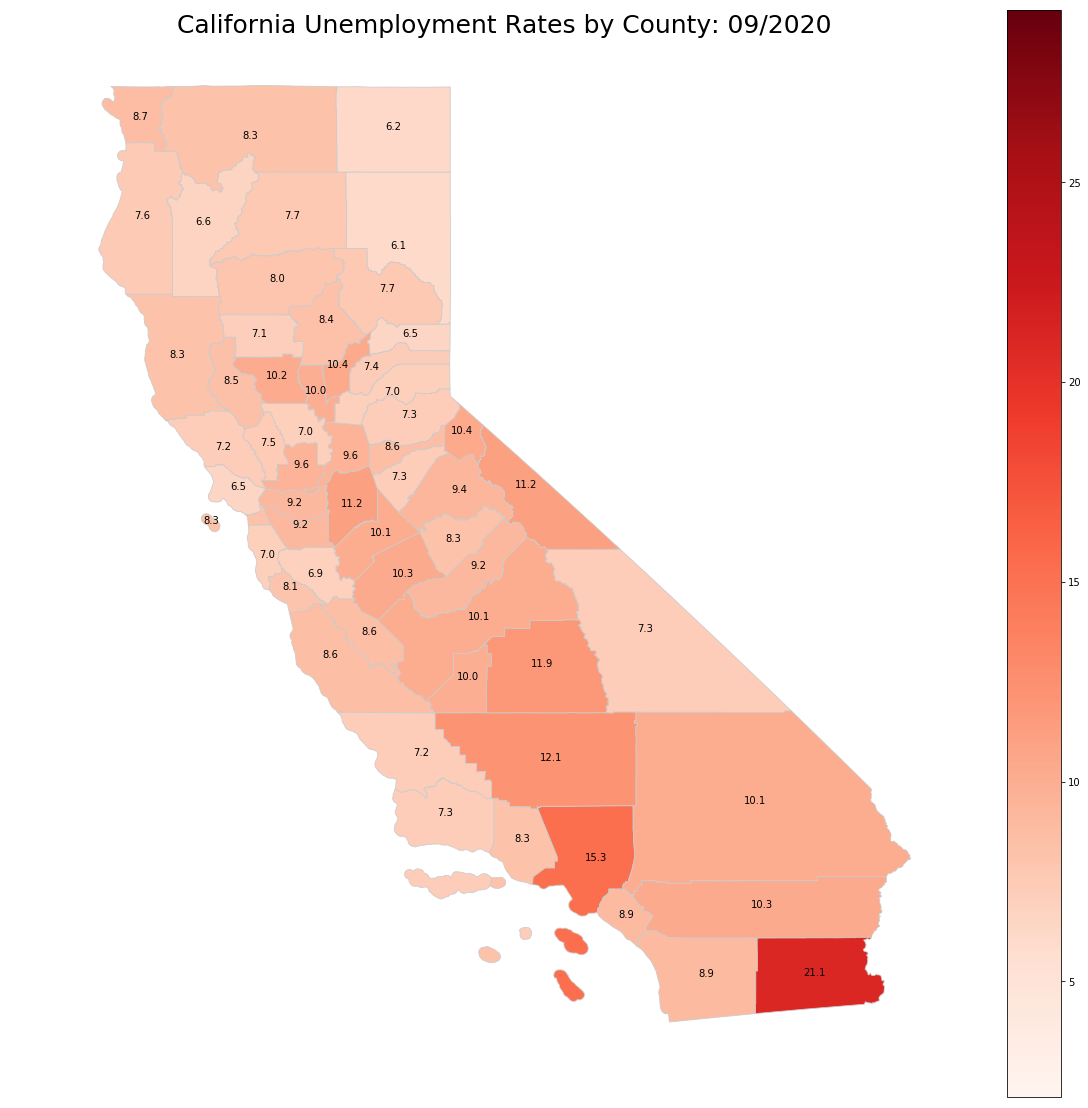

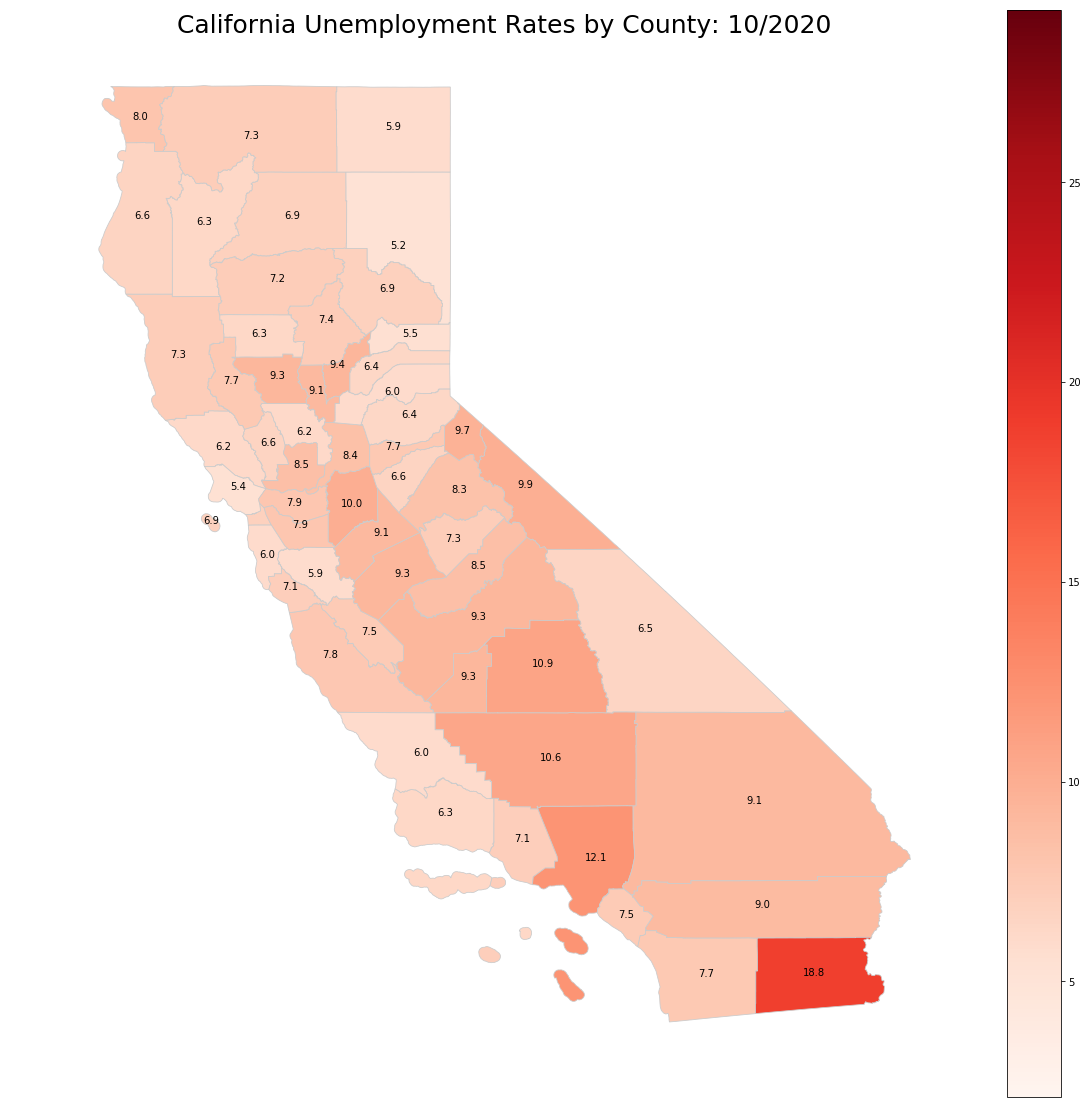

In [46]:
for i in range(1, int(df.month.max() + 1)):
    temp_month = str(i).zfill(2)
    temp_date = '2020-' + temp_month + '-01'
    temp_df = df[df['date'] == temp_date]
    temp_merged = pd.merge(mapdf, temp_df, how='inner', left_on=['NAME','GEOID'], right_on=['county','GEOID'])
    variable = 'unemployment_rate'

    fig, ax = plt.subplots(figsize=(20, 20))

    ax.axis('off')

    ax.set_title('California Unemployment Rates by County: ' + temp_month+'/2020', fontdict={'fontsize': '25', 'fontweight' : '3'})

    cmap= 'Reds'
    norm = matplotlib.colors.Normalize(df.unemployment_rate.min(), df.unemployment_rate.max()) 
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

    sm.set_array([]) 

    fig.colorbar(sm)

    # Add Labels
    temp_merged['coords'] = temp_merged['geometry'].apply(lambda x: x.representative_point().coords[:])
    temp_merged['coords'] = [coords[0] for coords in temp_merged['coords']]

    for idx, row in temp_merged.iterrows():
        plt.annotate(s=row['unemployment_rate'], 
    xy=row['coords'],horizontalalignment='center')
    
    fig = temp_merged.plot(column=variable, cmap=cmap, norm=norm, linewidth=0.8, ax=ax, edgecolor='0.8').get_figure()
    fig.savefig('choropleth_images/CA_unemployment_'+temp_month+'-2020.jpg')